# ROC Curve

In [1]:
from autogluon.tabular import TabularPredictor

# Load the model
predictor = TabularPredictor.load("AutogluonModels/all_features")

/scratch/users/bogdankostic/conda/envs/autogluon/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Inspect distinct models in ensemble
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.959883,roc_auc,47.736038,1900.249467,0.036021,22.188549,3,True,41
1,WeightedEnsemble_L2,0.959190,roc_auc,1.597107,51.548607,0.038514,21.164696,2,True,25
2,LightGBM_r96_BAG_L1,0.955613,roc_auc,0.383989,2.941946,0.383989,2.941946,1,True,19
3,LightGBMXT_BAG_L1,0.952943,roc_auc,0.146403,1.473227,0.146403,1.473227,1,True,3
4,NeuralNetFastAI_r102_BAG_L1,0.951226,roc_auc,0.962799,22.994585,0.962799,22.994585,1,True,24
5,CatBoost_BAG_L1,0.949906,roc_auc,0.045759,1.604641,0.045759,1.604641,1,True,7
6,CatBoost_r177_BAG_L1,0.949626,roc_auc,0.052708,1.510908,0.052708,1.510908,1,True,14
7,CatBoost_r137_BAG_L1,0.948393,roc_auc,0.048529,1.378616,0.048529,1.378616,1,True,23
8,LightGBM_r131_BAG_L1,0.948278,roc_auc,0.345997,3.756378,0.345997,3.756378,1,True,16
9,NeuralNetTorch_r79_BAG_L1,0.947742,roc_auc,2.688062,353.490790,2.688062,353.490790,1,True,15


In [3]:
import pandas as pd

# Load the test data
test_df = pd.read_csv("../../../data/preprocessed/image3.csv")
# Evaluate the model
predictor.evaluate(test_df)

TBB Warning: The number of workers is currently limited to 0. The request for 15 workers is ignored. Further requests for more workers will be silently ignored until the limit changes.



{'roc_auc': 0.8706870886378069,
 'accuracy': 0.7628554803985744,
 'balanced_accuracy': 0.7573771007228107,
 'mcc': 0.5082516601630933,
 'f1': 0.7049187746051857,
 'precision': 0.6786616711684238,
 'recall': 0.7332893993598193}

In [4]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
test_proba = predictor.predict_proba(test_df, as_multiclass=False)
# Compute ROC curve and ROC area for each class
fpr_full, tpr_full, _ = roc_curve(test_df["label"], test_proba)
roc_auc_full = auc(fpr_full, tpr_full)

In [5]:
# Load and evaluate the reduced model
predictor_reduced = TabularPredictor.load("AutogluonModels/engineered_features")
predictor.evaluate(test_df)

{'roc_auc': 0.8706870886378069,
 'accuracy': 0.7628554803985744,
 'balanced_accuracy': 0.7573771007228107,
 'mcc': 0.5082516601630933,
 'f1': 0.7049187746051857,
 'precision': 0.6786616711684238,
 'recall': 0.7332893993598193}

In [6]:
# Get prediction probabilities for reduced model
test_proba = predictor_reduced.predict_proba(test_df, as_multiclass=False)
# Compute ROC curve and ROC area for each class
fpr_reduced, tpr_reduced, _ = roc_curve(test_df["label"], test_proba)
roc_auc_reduced = auc(fpr_reduced, tpr_reduced)

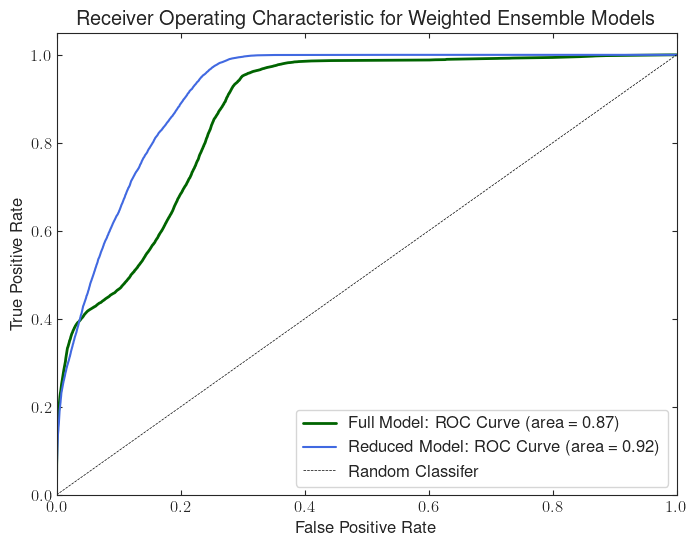

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style("white")
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] =  "Helvetica"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.bottom"] = True 
plt.rcParams["ytick.right"] = True 
plt.rcParams["ytick.left"] = True

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_full, y=tpr_full, label=f'Full Model: ROC Curve (area = {roc_auc_full:.2f})', lw=2, color="darkgreen", errorbar=None)
sns.lineplot(x=fpr_reduced, y=tpr_reduced, label=f'Reduced Model: ROC Curve (area = {roc_auc_reduced:.2f})', color="royalblue", errorbar=None)
sns.lineplot(x=[0, 1], y=[0, 1], color='black', lw=0.5, linestyle='--', errorbar=None, label="Random Classifer")

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Weighted Ensemble Models')
plt.legend(loc="lower right")
plt.savefig("../../../figs/roc_ensemble.pdf")
plt.show()

In [10]:
# Save tpr and fpr to compare with other models
roc_df = pd.DataFrame({"fpr": fpr_reduced, "tpr": tpr_reduced})
roc_df.to_csv("../../../data/roc_data/roc_ensemble.csv", index=False)

# Feature Importance

In [9]:
train_df = pd.read_csv("../../../data/preprocessed/image1_2.csv")

# Get feature importance
feature_importance = predictor.feature_importance(train_df)


These features in provided data are not utilized by the predictor and will be ignored: ['image']


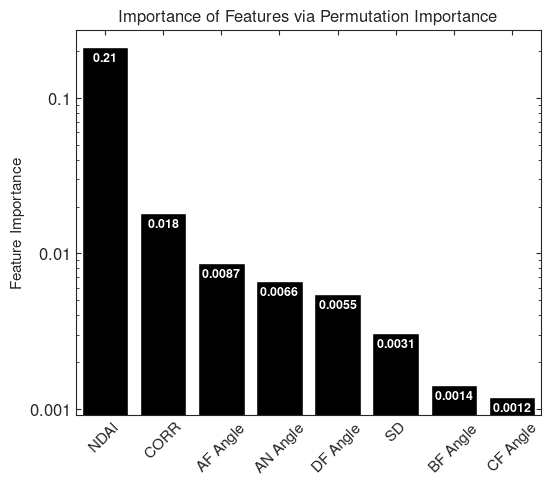

In [25]:
# Plot feature importance as a bar plot
fig, ax_barplot = plt.subplots(figsize=(6, 5))
sns.barplot(feature_importance["importance"], errorbar=None, color="black", ax=ax_barplot)
ax_barplot.set_title("Importance of Features via Permutation Importance", fontsize=12)
xtick_labels = ["NDAI", "CORR", "AF Angle", "AN Angle", "DF Angle", "SD", "BF Angle", "CF Angle"]
ax_barplot.set_xticks(range(len(xtick_labels)), xtick_labels, fontsize=11, rotation=45)
ax_barplot.set_ylabel("Feature Importance", fontsize=11)
plt.yscale("log")
ax_barplot.set_yticks([0.001, 0.01, 0.1], ["0.001", "0.01", "0.1"])
for container in ax_barplot.containers:
    ax_barplot.bar_label(
        container,
        labels=[r"\textbf{" + f"{bar.get_height():.2}" r"}" for bar in container],
        fontsize=9,
        color="white",
        weight="bold",
        label_type="edge",
        padding=-12,
    )
plt.show()

# Make Predictions on Test Set for Error Analysis

In [22]:
import numpy as np

# Load Image 3
img_3 = np.loadtxt("../../../data/image_data/image3.txt")[:, :6]
img_3_df = pd.DataFrame(img_3, columns=["y", "x", "label", "NDAI", "SD", "CORR"])

In [29]:
# Make predictions
img_3_df["pred"] = predictor_reduced.predict(img_3_df)
img_3_df["pred_prob"] = predictor_reduced.predict_proba(img_3_df, as_multiclass=False)

In [31]:
# Save preds
img_3_df.to_csv("../../../data/preds/img3_preds.csv", index=False)